In [1]:
import numpy as np, pandas as pd, seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, mean_squared_error, average_precision_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [2]:
X = pd.read_csv('train.csv', index_col = 'employee_id')
X_test = pd.read_csv('test.csv', index_col = 'employee_id')
X.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.9+ MB


# Cleaning Dataset: 

In [4]:
X['previous_year_rating'].fillna(1.0, inplace = True)
X_test['previous_year_rating'].fillna(1.0, inplace = True)
X['previous_year_rating'] = X['previous_year_rating'].astype('int64')
X_test['previous_year_rating'] = X_test['previous_year_rating'].astype('int64')

X['previous_year_rating'].unique()

array([5, 3, 1, 4, 2], dtype=int64)

In [5]:
X['education'].fillna(X['education'].mode()[0], inplace = True)
X_test['education'].fillna(X_test['education'].mode()[0], inplace = True)

X['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

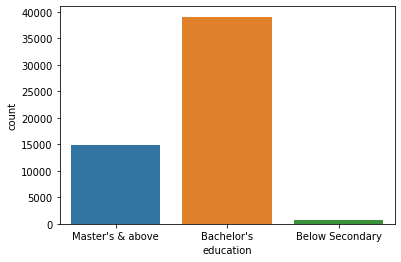

In [6]:
sns.countplot(x='education', data =X)

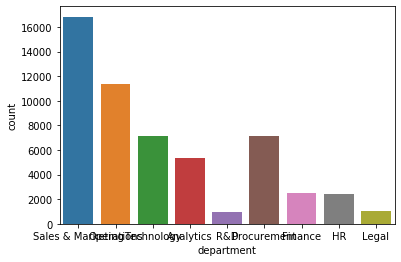

In [7]:
sns.countplot(x='department', data = X)

In [8]:
X['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [9]:
X.groupby('department')['previous_year_rating'].mean()

department
Analytics            3.334641
Finance              3.226735
HR                   3.230356
Legal                3.016362
Operations           3.495770
Procurement          3.160689
R&D                  3.340340
Sales & Marketing    2.906948
Technology           2.993556
Name: previous_year_rating, dtype: float64

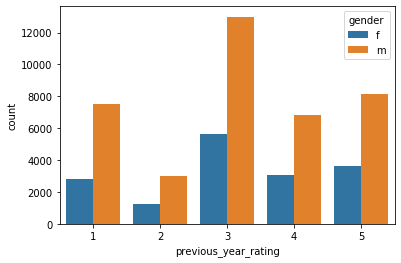

In [10]:
sns.countplot(x = 'previous_year_rating', hue='gender', data = X)

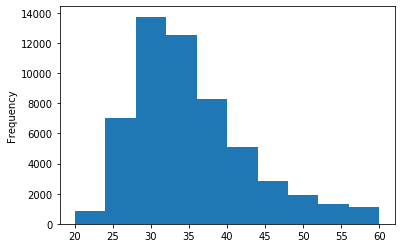

In [11]:
X['age'].plot.hist()

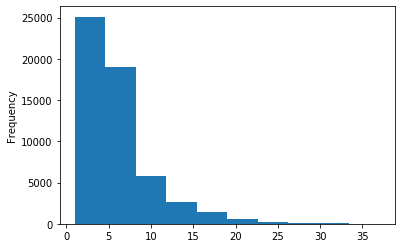

In [12]:
X['length_of_service'].plot.hist()

# Label Encoding: 

In [13]:
department = pd.get_dummies(X['department'], 
                                    prefix ='dep')
region = pd.get_dummies(X['region'], 
                                    prefix ='reg')
education = pd.get_dummies(X['education'], 
                                    prefix ='ed')
gender = pd.get_dummies(X['gender'], 
                                    prefix ='gen')
recruitment_channel = pd.get_dummies(X['recruitment_channel'], 
                                    prefix ='rc')

X = pd.concat([X, department, region, 
               education, gender, recruitment_channel], 
              axis = 1)

X.drop(['department', 'region', 
        'education', 'gender', 'recruitment_channel'], 
       axis=1, inplace=True)

department = pd.get_dummies(X_test['department'], 
                                    prefix ='dep')
region = pd.get_dummies(X_test['region'], 
                                    prefix ='reg')
education = pd.get_dummies(X_test['education'], 
                                    prefix ='ed')
gender = pd.get_dummies(X_test['gender'], 
                                    prefix ='gen')
recruitment_channel = pd.get_dummies(X_test['recruitment_channel'], 
                                    prefix ='rc')

X_test = pd.concat([X_test, department, region, 
               education, gender, recruitment_channel], 
              axis = 1)

X_test.drop(['department', 'region',
             'education', 'gender', 'recruitment_channel'], 
            axis=1, inplace=True)

In [14]:
X.shape, X_test.shape

((54808, 59), (23490, 58))

In [15]:
set(X.columns) - set(X_test.columns)

{'is_promoted'}

In [16]:
X

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,dep_Analytics,dep_Finance,...,reg_region_8,reg_region_9,ed_Bachelor's,ed_Below Secondary,ed_Master's & above,gen_f,gen_m,rc_other,rc_referred,rc_sourcing
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,1,35,5,8,1,0,49,0,0,0,...,0,0,0,0,1,1,0,0,0,1
65141,1,30,5,4,0,0,60,0,0,0,...,0,0,1,0,0,0,1,1,0,0
7513,1,34,3,7,0,0,50,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2542,2,39,1,10,0,0,50,0,0,0,...,0,0,1,0,0,0,1,1,0,0
48945,1,45,3,2,0,0,73,0,0,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,1,48,3,17,0,0,78,0,0,0,...,0,0,1,0,0,0,1,0,0,1
74592,1,37,2,6,0,0,56,0,0,0,...,0,0,0,0,1,1,0,1,0,0
13918,1,27,5,3,1,0,79,0,1,0,...,0,0,1,0,0,0,1,1,0,0


In [17]:
y = X.is_promoted              
X.drop(['is_promoted'], axis=1, inplace=True)

In [19]:
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_sample(X, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (100280, 58)
Size of y-sample : (100280, 1)


In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(x_sample, y_sample, train_size=0.75, test_size=0.25,
                                                                random_state=100)

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)
X_valid = sc.transform(X_valid)

# Model Training: 

In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_valid)

print("Training Accuracy :", rfc.score(X_train, y_train))

print("Validation Accuracy :", rfc.score(X_valid, y_valid))

cm = confusion_matrix(y_valid, rfc_pred)
print(cm)

cr = classification_report(y_valid, rfc_pred)
print(cr)

apc = average_precision_score(y_valid, rfc_pred)
print("Average Precision Score :", apc)

C:\Users\piyus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Training Accuracy : 0.9998404467491026
Validation Accuracy : 0.9609094535301157
[[12207   300]
 [  680 11883]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     12507
           1       0.98      0.95      0.96     12563

    accuracy                           0.96     25070
   macro avg       0.96      0.96      0.96     25070
weighted avg       0.96      0.96      0.96     25070

Average Precision Score : 0.9497052309554432


In [30]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

rfc_pred = xgb.predict(X_valid)

print("Training Accuracy :", xgb.score(X_train, y_train))

print("Validation Accuracy :", xgb.score(X_valid, y_valid))

cm = confusion_matrix(y_valid, rfc_pred)
print(cm)

cr = classification_report(y_valid, rfc_pred)
print(cr)

apc = average_precision_score(y_valid, rfc_pred)
print("Average Precision Score :", apc)

C:\Users\piyus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training Accuracy : 0.9033772104773301
Validation Accuracy : 0.9020741922616673
[[11403  1104]
 [ 1351 11212]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     12507
           1       0.91      0.89      0.90     12563

    accuracy                           0.90     25070
   macro avg       0.90      0.90      0.90     25070
weighted avg       0.90      0.90      0.90     25070

Average Precision Score : 0.8663512613024993


In [31]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
lgb.fit(X_train, y_train)

rfc_pred = lgb.predict(X_valid)

print("Training Accuracy :", lgb.score(X_train, y_train))

print("Validation Accuracy :", lgb.score(X_valid, y_valid))

cm = confusion_matrix(y_valid, rfc_pred)
print(cm)

cr = classification_report(y_valid, rfc_pred)
print(cr)

apc = average_precision_score(y_valid, rfc_pred)
print("Average Precision Score :", apc)

Training Accuracy : 0.9523334662943758
Validation Accuracy : 0.9491822895891504
[[12417    90]
 [ 1184 11379]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     12507
           1       0.99      0.91      0.95     12563

    accuracy                           0.95     25070
   macro avg       0.95      0.95      0.95     25070
weighted avg       0.95      0.95      0.95     25070

Average Precision Score : 0.9458750799154884


In [32]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

rfc_pred = etc.predict(X_valid)

print("Training Accuracy :", etc.score(X_train, y_train))

print("Validation Accuracy :", etc.score(X_valid, y_valid))

cm = confusion_matrix(y_valid, rfc_pred)
print(cm)

cr = classification_report(y_valid, rfc_pred)
print(cr)

apc = average_precision_score(y_valid, rfc_pred)
print("Average Precision Score :", apc)

C:\Users\piyus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Training Accuracy : 0.9998404467491026
Validation Accuracy : 0.9556043079377742
[[12178   329]
 [  784 11779]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     12507
           1       0.97      0.94      0.95     12563

    accuracy                           0.96     25070
   macro avg       0.96      0.96      0.96     25070
weighted avg       0.96      0.96      0.96     25070

Average Precision Score : 0.9433905321128727


In [183]:
y_pred_test = modelbnb.predict(X_test)

output = pd.DataFrame({'employee_id': X_test.index,
                       'is_promoted': y_pred_test})
output.to_csv('sample_submission_M0L0uXE.csv', index=False)